In [ ]:
#libraries
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

!pip install pydicom
import glob
import pydicom
from PIL import Image

# local imports
# install voxelmorph, which will also install dependencies: neurite and pystrum
!pip install voxelmorph
import voxelmorph as vxm
import neurite as ne

# imports
import os, sys

# third party imports
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2.'), 'This tutorial assumes Tensorflow 2.0+'


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 608.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystrum: filename=pystrum-0.3-py3-none-any.whl size=19530 sha256=13d88fdbf68cf2a7f13beed2f6d29ae321fe5babe80049c619890a521064c986
  Stored in directory: /root/.cache/pip/wheels/33/42/e2/6312e2cd3efadacc2714759efc7c7dc1513db7853e8bd508f6
Successfully built pystrum


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def getImages(folder):
  os.chdir(f'/content/drive/My Drive/images_final/{folder}')
  images = []
  for img_path in glob.glob("*.JPG"):
    img = Image.open(img_path)
    img = img.resize((256,256))
    img = img.convert('L')
    images.append(img)
  for img_path in glob.glob("*.png"):
    img = Image.open(img_path)
    img = img.resize((256,256))
    img = img.convert('L')
    images.append(img)
  return images

In [ ]:
def getImages2(path):
  images = []
  images = [path + i for i in os.listdir(path)]
  for img in images:
    img = Image.open(img)
    img = img.resize((256,256))
    img = img.convert('L')
    images.append(img)
  return images

In [ ]:
# left_path = r"C:\Users\talia\PycharmProjects\finalProject\Final_Project_Image_Ragistration\data_manipulation\data_after_back_no_bg/"
# left = getImages2(left_path)
# left

In [ ]:
# images_1 = getImages('1')
images_2 = np.array(getImages('2'))
images_3 = np.array(getImages('3'))
images_4 = np.array(getImages('4'))
images_5 = np.array(getImages('5'))
images_6 = np.array(getImages('6'))
images_7 = np.array(getImages('7'))
images_8 = np.array(getImages('8'))
images_9 = np.array(getImages('9'))
images_10 = np.array(getImages('10'))
images_11 = np.array(getImages('11'))

<ipython-input-4-d652c60ad5a8>:2: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  images_2 = np.array(getImages('2'))
<ipython-input-4-d652c60ad5a8>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images_2 = np.array(getImages('2'))
<ipython-input-4-d652c60ad5a8>:3: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding p

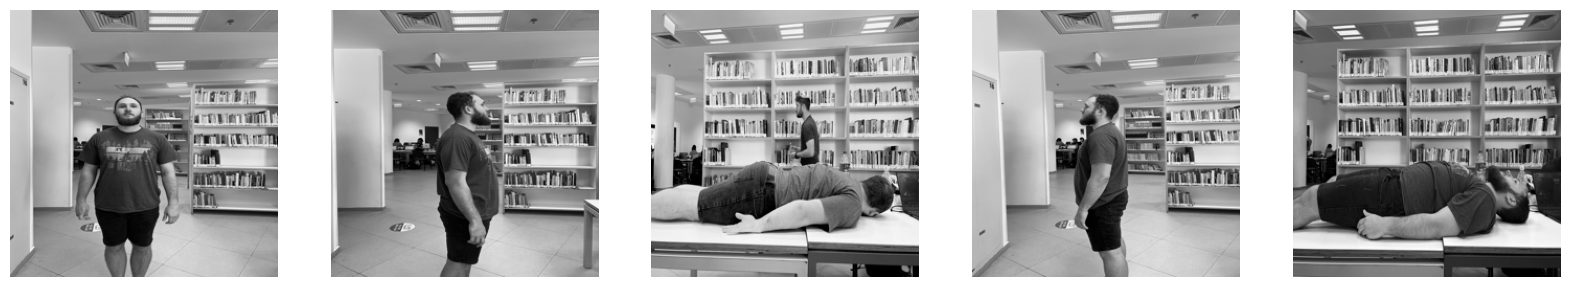

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(20,20))
for i in range(5):
  img = images_8[i]
  axs[i].imshow(img, cmap =plt.cm.gray)
  axs[i].axis('off')

In [ ]:
left = np.array([images_11[4], images_10[4], images_9[1], images_8[3], images_7[0], images_6[3], images_5[0], images_4[1], images_3[2], images_2[4]])
back = np.array([images_11[2], images_10[0], images_9[0], images_8[4], images_7[4], images_6[4], images_5[4], images_4[0], images_3[0], images_2[2]])

<ipython-input-53-b2b7b8fc3048>:1: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  left = np.array([images_11[4], images_10[4], images_9[1], images_8[3], images_7[0], images_6[3], images_5[0], images_4[1], images_3[2], images_2[4]])
<ipython-input-53-b2b7b8fc3048>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  left = np.array([images_11[4], images_10[4], images_9[1], 

In [ ]:
for i,img in enumerate(left):
  left[i] = np.asarray(img)

for i,img in enumerate(back):
  back[i] = np.asarray(img)

rand1 = 0
rand2 = 0
while(rand1 == rand2):
  rand1 = np.random.randint(0,10)
  rand2 = np.random.randint(0,9)

x_test = np.array([left[rand1], left[rand2]])
y_test = np.array([back[rand1], back[rand2]])
left_list = [left[i] for i in range(len(left)) if i not in [rand1,rand2]]
back_list = [back[i] for i in range(len(back)) if i not in [rand1,rand2]]

x_train = np.array(left_list)
y_train = np.array(back_list)

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset
import random

# Define the transforms to be applied to the images
transform = transforms.Compose([
    transforms.Resize((256, 256)),       # Resize the images to a fixed size
    transforms.Grayscale(),               # Convert images to grayscale
    transforms.ToTensor()                  # Convert images to tensors
])

# Set the paths to your folders containing the images
folder1_path = "/content/drive/MyDrive/final_project_data/Posture/left"
folder2_path = "/content/drive/MyDrive/final_project_data/Posture/back"

# Create custom dataset class for paired images
class PairedImageDataset(Dataset):
    def __init__(self, folder1_path, folder2_path, transform=None):
        self.folder1_dataset = ImageFolder(folder1_path, transform=transform)
        self.folder2_dataset = ImageFolder(folder2_path, transform=transform)
        self.transform = transform

    def __getitem__(self, index):
        img1, _ = self.folder1_dataset[random.randint(0, len(self.folder1_dataset) - 1)]

        img2, _ = self.folder2_dataset[random.randint(0, len(self.folder2_dataset) - 1)]
        return img1, img2

    def __len__(self):
        return max(len(self.folder1_dataset), len(self.folder2_dataset))

# Create the paired dataset
paired_dataset = PairedImageDataset(folder1_path, folder2_path, transform=transform)

# Create the train_loader
batch_size = 1   # Set your desired batch size
train_loader = DataLoader(paired_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(paired_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
print(x_test.shape, y_test.shape)
print(x_train.shape, y_train.shape)

NameError: ignored

### Visualize Data

[184 192  99 527 198]


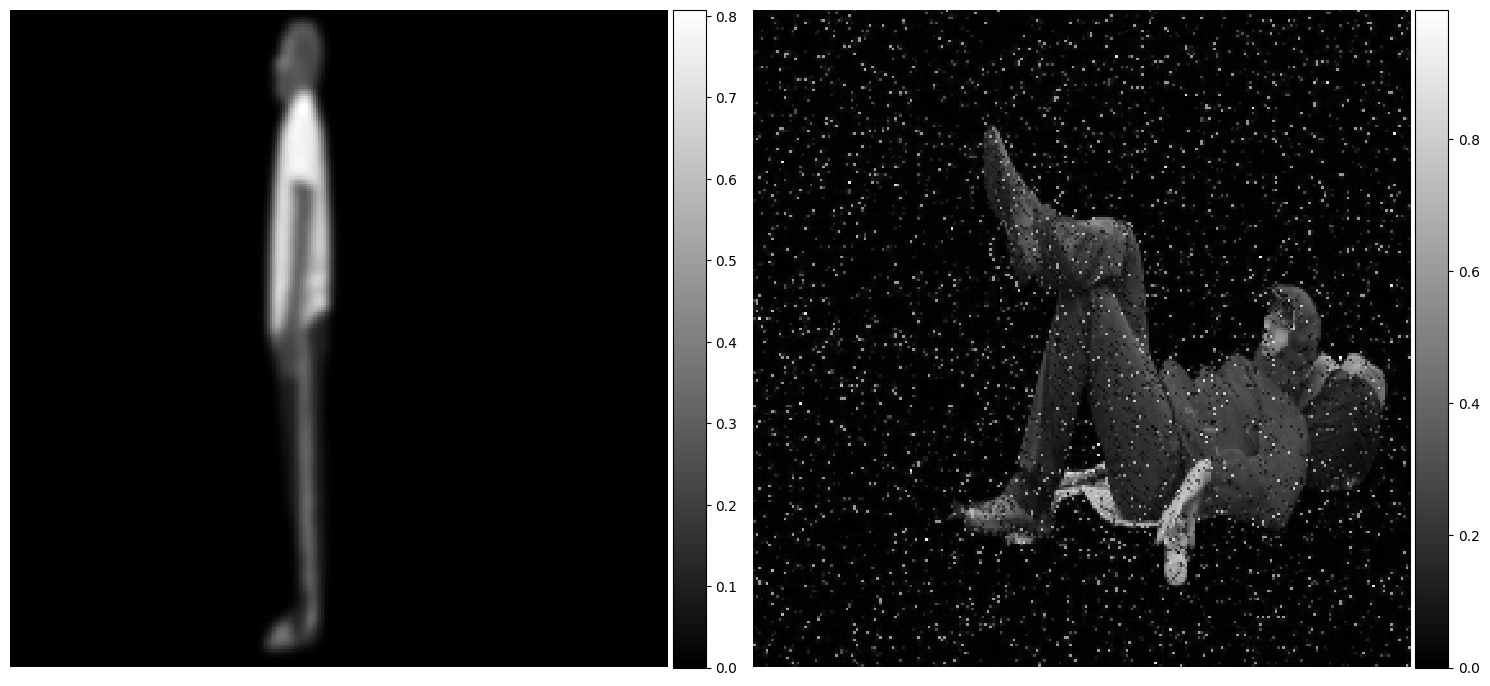

In [ ]:
nb_vis = 5

# choose nb_vis sample indexes
idx = np.random.choice(len(paired_dataset), nb_vis, replace=False)
print(idx)
example_digits = [f for f in paired_dataset[idx, ...]]
# plot
ne.plot.slices(example_digits, cmaps=['gray'], do_colorbars=True);

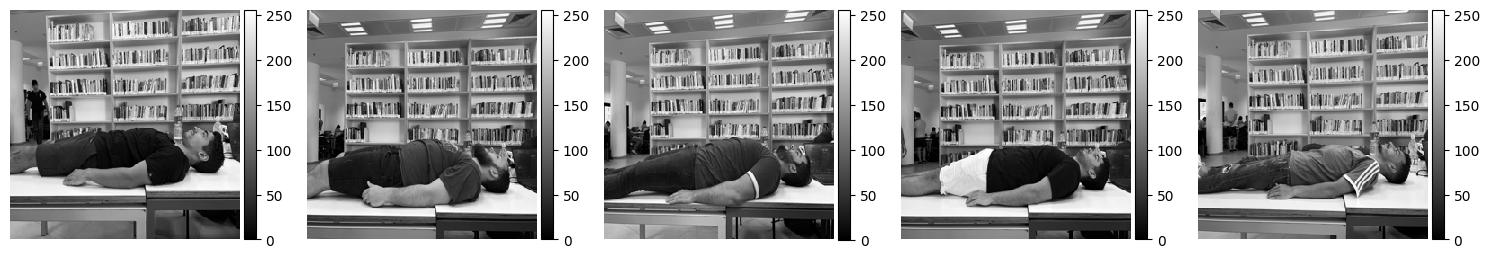

In [ ]:
nb_vis = 5

# choose nb_vis sample indexes
idx = np.random.choice(y_train.shape[0], nb_vis, replace=False)
example_digits = [f for f in y_train[idx, ...]]

# plot
ne.plot.slices(example_digits, cmaps=['gray'], do_colorbars=True);

In [ ]:
# fix data
x_train = x_train.astype('float')/255
y_train = y_train.astype('float')/255
# x_val = x_val.astype('float')/255
x_test = x_test.astype('float')/255
y_test = y_test.astype('float')/255

# verify
print('training maximum value', x_train.max())

training maximum value 1.0


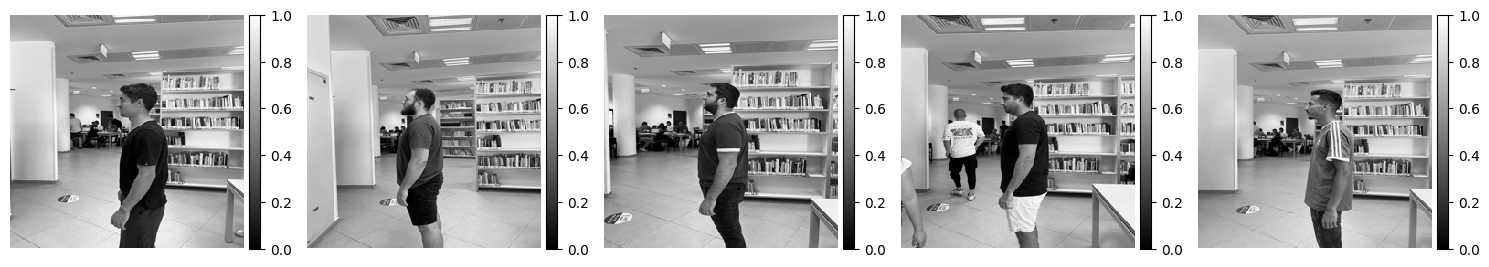

In [ ]:
# re-visualize
example_people = [f for f in x_train[idx, ...]]
ne.plot.slices(example_people, cmaps=['gray'], do_colorbars=True);

In [ ]:
# build model using VxmDense
nb_features = [
    [256, 256, 256, 256,256],         # encoder features
    [256, 256, 256, 256, 256,256, 128,128]  # decoder features
]
image,label = next(iter(train_loader))
image = image.squeeze()
print(image.shape)
inshape = image.shape
vxm_model = vxm.networks.VxmDense(inshape, nb_features, int_steps=0)

torch.Size([256, 256])


In [ ]:
print('input shape: ', ', '.join([str(t.shape) for t in vxm_model.inputs]))
print('output shape:', ', '.join([str(t.shape) for t in vxm_model.outputs]))

input shape:  (None, 256, 256, 1), (None, 256, 256, 1)
output shape: (None, 256, 256, 1), (None, 256, 256, 2)


In [ ]:
# voxelmorph has a variety of custom loss classes
losses = [vxm.losses.MSE().loss, vxm.losses.Grad('l2').loss]

# usually, we have to balance the two losses by a hyper-parameter
lambda_param = 0.05
loss_weights = [1, lambda_param]
vxm_model.compile(optimizer='Adam', loss=losses, loss_weights=loss_weights)

In [ ]:
def vxm_data_generator(loader, batch_size=1):
    """
    Generator that takes in data of size [N, H, W], and yields data for
    our custom vxm model. Note that we need to provide numpy data for each
    input, and each output.

    inputs:  moving [bs, H, W, 1], fixed image [bs, H, W, 1]
    outputs: moved image [bs, H, W, 1], zero-gradient [bs, H, W, 2]
    """

    # preliminary sizing
    vol_shape = (256,256) # extract data shape
    ndims = len(vol_shape)

    # prepare a zero array the size of the deformation
    # we'll explain this below
    zero_phi = np.zeros([batch_size, *vol_shape, ndims])

    while True:
        # prepare inputs:
        # images need to be of the size [batch_size, H, W, 1]
        image,fixed = next(iter(loader))
        #image = transforms.functional.rotate(image,-90)
        image = image.squeeze()
        image = image.reshape((1,256,256,1))
        fixed = fixed.squeeze()
        fixed = fixed.reshape((1,256,256,1))
        inputs = [image, fixed]

        # prepare outputs (the 'true' moved image):
        # of course, we don't have this, but we know we want to compare
        # the resulting moved image with the fixed image.
        # we also wish to penalize the deformation field.
        outputs = [fixed, zero_phi]

        yield (inputs, outputs)

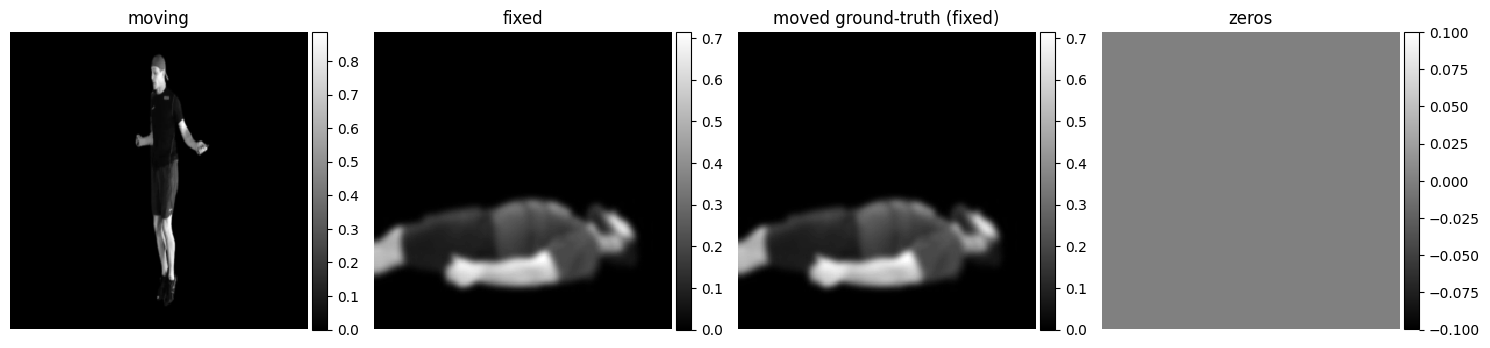

In [ ]:
# let's test it
train_generator = vxm_data_generator(train_loader)
in_sample, out_sample = next(train_generator)

# visualize

images = [img[0, :, :, 0] for img in in_sample + out_sample]
titles = ['moving', 'fixed', 'moved ground-truth (fixed)', 'zeros']
ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True);

In [ ]:
nb_epochs = 10
hist = vxm_model.fit_generator(train_generator, epochs=nb_epochs,steps_per_epoch=10, verbose=2);
# Try to add picutres with masks insted of people
# try to work with posenet

<ipython-input-9-82cd30ea5b25>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = vxm_model.fit_generator(train_generator, epochs=nb_epochs,steps_per_epoch=10, verbose=2);


Epoch 1/10
10/10 - 254s - loss: 0.0376 - vxm_dense_transformer_loss: 0.0372 - vxm_dense_flow_loss: 0.0070 - 254s/epoch - 25s/step
Epoch 2/10
10/10 - 234s - loss: 0.0312 - vxm_dense_transformer_loss: 0.0292 - vxm_dense_flow_loss: 0.0410 - 234s/epoch - 23s/step
Epoch 3/10
10/10 - 236s - loss: 0.0373 - vxm_dense_transformer_loss: 0.0359 - vxm_dense_flow_loss: 0.0279 - 236s/epoch - 24s/step
Epoch 4/10
10/10 - 245s - loss: 0.0512 - vxm_dense_transformer_loss: 0.0496 - vxm_dense_flow_loss: 0.0310 - 245s/epoch - 25s/step
Epoch 5/10
10/10 - 240s - loss: 0.0462 - vxm_dense_transformer_loss: 0.0369 - vxm_dense_flow_loss: 0.1844 - 240s/epoch - 24s/step
Epoch 6/10
10/10 - 244s - loss: 0.0376 - vxm_dense_transformer_loss: 0.0340 - vxm_dense_flow_loss: 0.0718 - 244s/epoch - 24s/step
Epoch 7/10
10/10 - 236s - loss: 0.0654 - vxm_dense_transformer_loss: 0.0347 - vxm_dense_flow_loss: 0.6135 - 236s/epoch - 24s/step
Epoch 8/10
10/10 - 237s - loss: 12.8318 - vxm_dense_transformer_loss: 0.0435 - vxm_dense_f

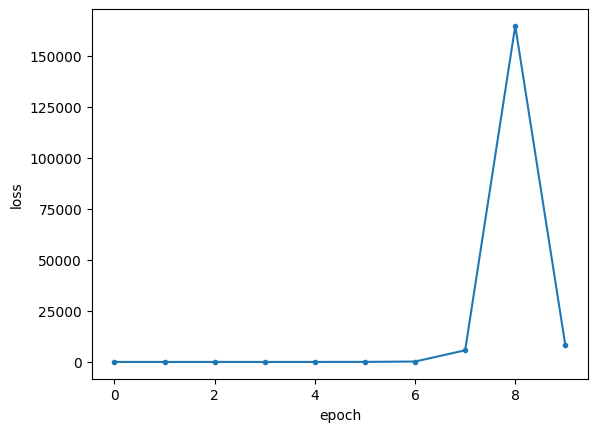

In [ ]:
import matplotlib.pyplot as plt

def plot_history(hist, loss_name='loss'):
    # Simple function to plot training history.
    plt.figure()
    plt.plot(hist.epoch, hist.history[loss_name], '.-')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

plot_history(hist)

In [ ]:
# let's get some data
val_generator = vxm_data_generator(test_loader, batch_size = 1)
val_input, _ = next(val_generator)
for i in range(len(val_input)):
  val_input[i] = tf.convert_to_tensor(val_input[i].numpy())

In [ ]:
val_pred = vxm_model.predict(val_input)

1/1 [==============================] - 12s 12s/step


In [ ]:
# %timeit is a 'jupyter magic' that times the given line over several runs
%timeit vxm_model.predict(val_input)

1/1 [==============================] - 7s 7s/step
9.95 s ± 4.75 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


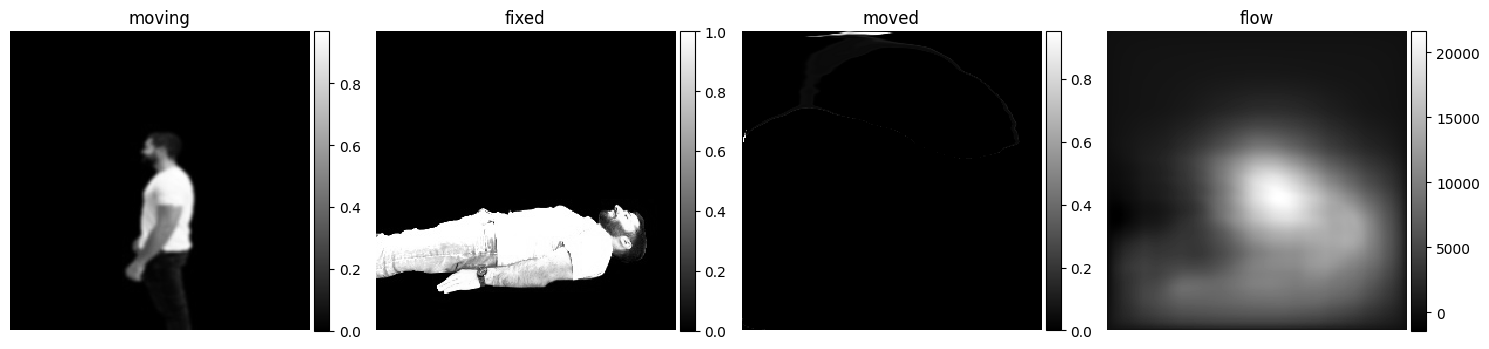

In [ ]:
# visualize
images = [img[0, :, :, 0] for img in val_input + val_pred]
titles = ['moving', 'fixed', 'moved', 'flow']
ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True);

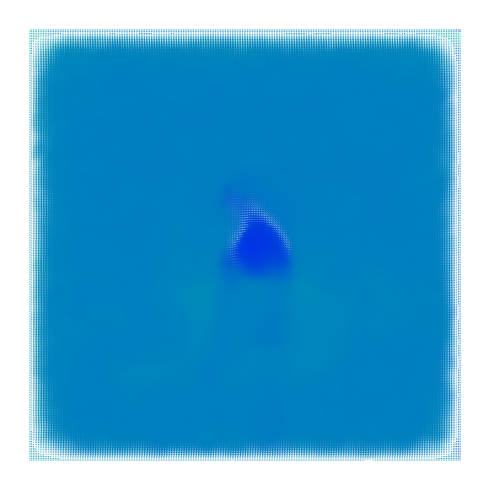

In [ ]:
ne.plot.flow([val_pred[1].squeeze()], width=5);

# Black Backgroung

In [ ]:
left_black = np.array(getImages('left'))
back_black = np.array(getImages('back'))

<ipython-input-60-8d21a6b1e375>:1: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  left_black = np.array(getImages('left'))
<ipython-input-60-8d21a6b1e375>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  left_black = np.array(getImages('left'))
<ipython-input-60-8d21a6b1e375>:2: FutureWarning: The input object of type 'Image' is an array-like implementing one of the co

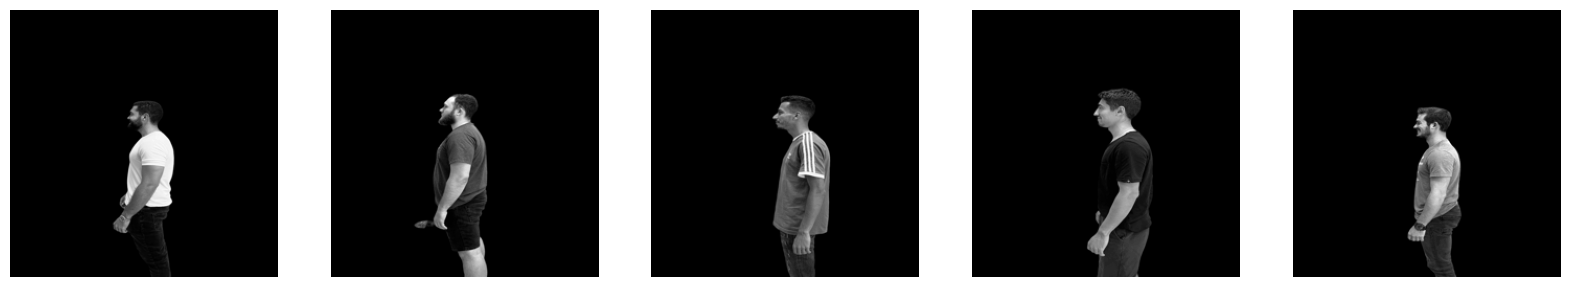

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(20,20))
for i in range(5):
  img = left_black[i]
  axs[i].imshow(img, cmap =plt.cm.gray)
  axs[i].axis('off')

In [ ]:
for i,img in enumerate(left_black):
  left_black[i] = np.asarray(img)

for i,img in enumerate(back_black):
  back_black[i] = np.asarray(img)

rand1 = 0
rand2 = 0
while(rand1 == rand2):
  rand1 = np.random.randint(0,10)
  rand2 = np.random.randint(0,9)

x_test = np.array([left_black[rand1], left_black[rand2]])
y_test = np.array([back_black[rand1], back_black[rand2]])
left_black_list = [left_black[i] for i in range(len(left_black)) if i not in [rand1,rand2]]
back_black_list = [back_black[i] for i in range(len(back_black)) if i not in [rand1,rand2]]

x_train = np.array(left_black_list)
y_train = np.array(back_black_list)

In [ ]:
print(x_test.shape, y_test.shape)
print(x_train.shape, y_train.shape)

(2, 256, 256) (2, 256, 256)
(8, 256, 256) (8, 256, 256)


In [ ]:
# fix data
x_train = x_train.astype('float')/255
y_train = y_train.astype('float')/255
# x_val = x_val.astype('float')/255
x_test = x_test.astype('float')/255
y_test = y_test.astype('float')/255

# verify
print('training maximum value', x_train.max())

training maximum value 1.0


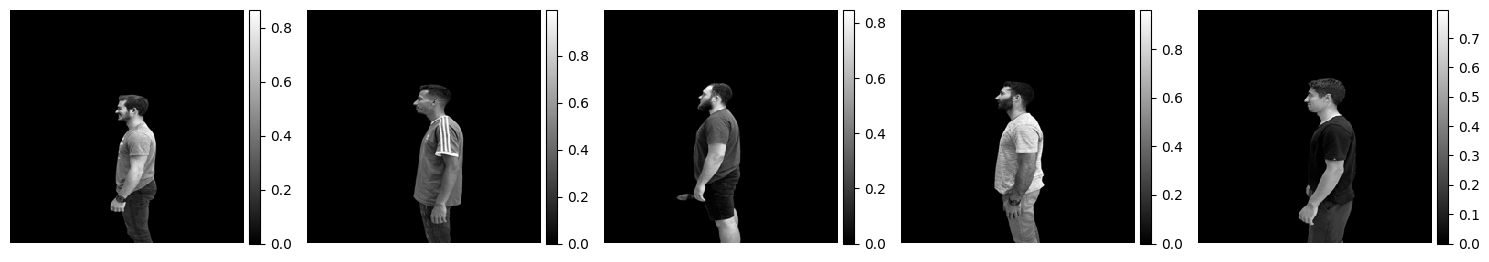

In [ ]:
# re-visualize
example_people = [f for f in x_train[idx, ...]]
ne.plot.slices(example_people, cmaps=['gray'], do_colorbars=True);

In [ ]:
# build model using VxmDense
nb_features = [
    [256, 256, 256, 256],         # encoder features
    [256, 256, 256, 256, 256, 128]  # decoder features
]

inshape = x_train.shape[1:]
vxm_model = vxm.networks.VxmDense(inshape, nb_features, int_steps=0)

In [ ]:
print('input shape: ', ', '.join([str(t.shape) for t in vxm_model.inputs]))
print('output shape:', ', '.join([str(t.shape) for t in vxm_model.outputs]))

input shape:  (None, 256, 256, 1), (None, 256, 256, 1)
output shape: (None, 256, 256, 1), (None, 256, 256, 2)


In [ ]:
# voxelmorph has a variety of custom loss classes
losses = [vxm.losses.MSE().loss, vxm.losses.Grad('l2').loss]

# usually, we have to balance the two losses by a hyper-parameter
lambda_param = 0.05
loss_weights = [1, lambda_param]
vxm_model.compile(optimizer='Adam', loss=losses, loss_weights=loss_weights)

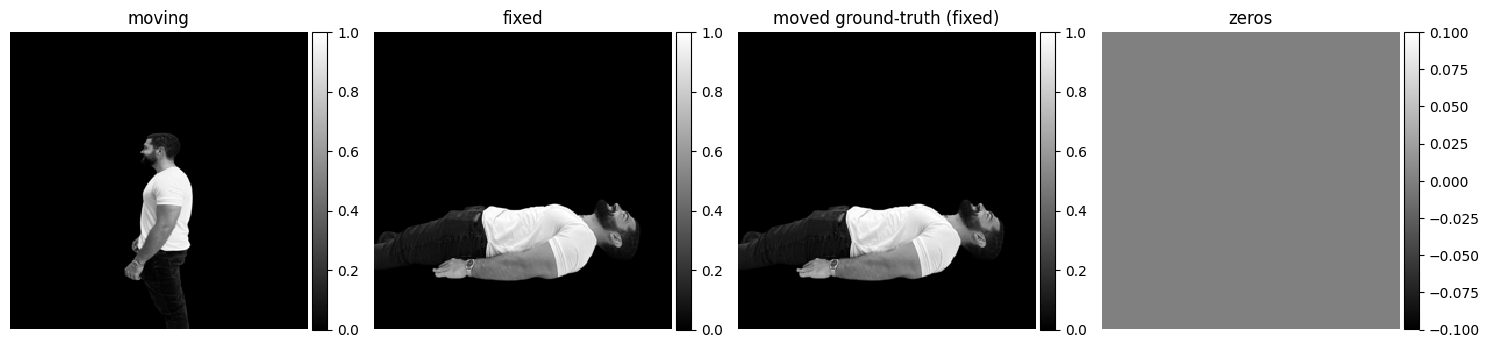

In [ ]:
# let's test it
train_generator = vxm_data_generator(x_train,y_train)
in_sample, out_sample = next(train_generator)

# visualize
images = [img[0, :, :, 0] for img in in_sample + out_sample]
titles = ['moving', 'fixed', 'moved ground-truth (fixed)', 'zeros']
ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True);

In [ ]:
nb_epochs = 8
hist = vxm_model.fit_generator(train_generator, epochs=nb_epochs,steps_per_epoch=10, verbose=2);


<ipython-input-71-67609ddd4958>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = vxm_model.fit_generator(train_generator, epochs=nb_epochs,steps_per_epoch=10, verbose=2);


Epoch 1/10
10/10 - 244s - loss: 0.0466 - vxm_dense_transformer_loss: 0.0443 - vxm_dense_flow_loss: 0.0467 - 244s/epoch - 24s/step
Epoch 2/10
10/10 - 215s - loss: 0.0379 - vxm_dense_transformer_loss: 0.0364 - vxm_dense_flow_loss: 0.0309 - 215s/epoch - 21s/step
Epoch 3/10
10/10 - 216s - loss: 0.0308 - vxm_dense_transformer_loss: 0.0295 - vxm_dense_flow_loss: 0.0265 - 216s/epoch - 22s/step
Epoch 4/10
10/10 - 216s - loss: 0.0325 - vxm_dense_transformer_loss: 0.0302 - vxm_dense_flow_loss: 0.0446 - 216s/epoch - 22s/step
Epoch 5/10
10/10 - 209s - loss: 0.0340 - vxm_dense_transformer_loss: 0.0310 - vxm_dense_flow_loss: 0.0590 - 209s/epoch - 21s/step
Epoch 6/10
10/10 - 210s - loss: 0.0283 - vxm_dense_transformer_loss: 0.0264 - vxm_dense_flow_loss: 0.0382 - 210s/epoch - 21s/step
Epoch 7/10
10/10 - 209s - loss: 0.0315 - vxm_dense_transformer_loss: 0.0285 - vxm_dense_flow_loss: 0.0588 - 209s/epoch - 21s/step
Epoch 8/10
10/10 - 207s - loss: 0.0440 - vxm_dense_transformer_loss: 0.0358 - vxm_dense_fl

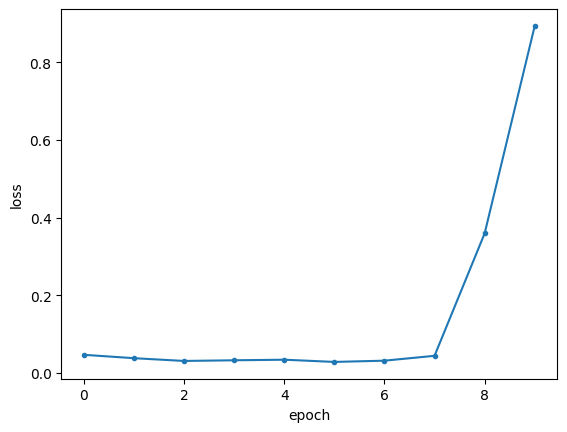

In [ ]:
import matplotlib.pyplot as plt

def plot_history(hist, loss_name='loss'):
    # Simple function to plot training history.
    plt.figure()
    plt.plot(hist.epoch, hist.history[loss_name], '.-')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

plot_history(hist)

# Registration

In [ ]:
# let's get some data
val_generator = vxm_data_generator(x_test, y_test, batch_size = 1)
val_input, _ = next(val_generator)

In [ ]:
val_pred = vxm_model.predict(val_input)

1/1 [==============================] - 8s 8s/step


In [ ]:
# %timeit is a 'jupyter magic' that times the given line over several runs
%timeit vxm_model.predict(val_input)

1/1 [==============================] - 7s 7s/step
5.88 s ± 929 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


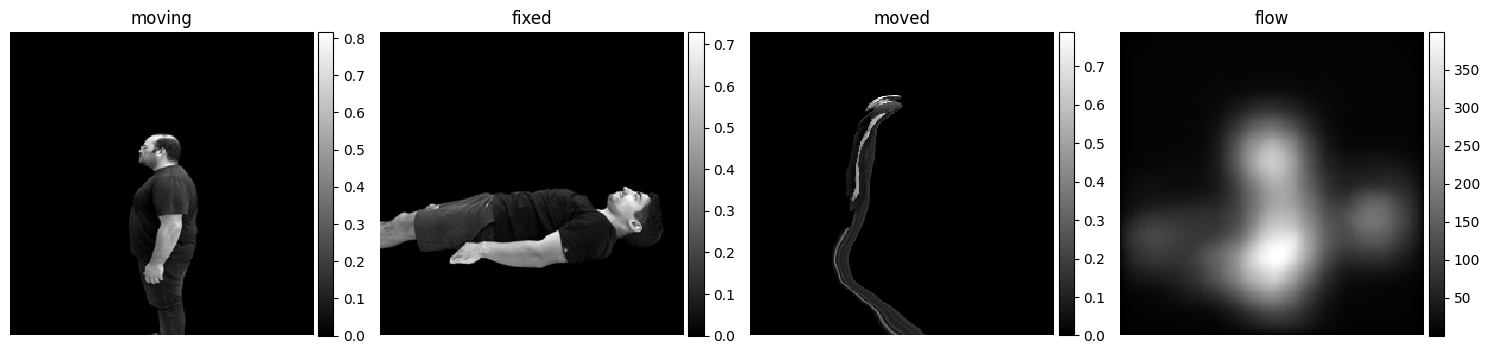

In [ ]:
# visualize
images = [img[0, :, :, 0] for img in val_input + val_pred]
titles = ['moving', 'fixed', 'moved', 'flow']
ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True);

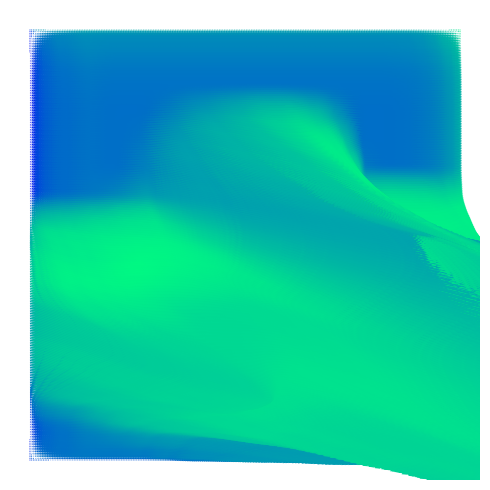

In [ ]:
ne.plot.flow([val_pred[1].squeeze()], width=5);

In [ ]:
def removePathName(path,name):
  print(os.listdir(path))
  for filename in os.listdir(path):
    if name in filename:
        # Construct the full file path
        file_path = os.path.join(path, filename)

        # Remove the file
        os.remove(file_path)
        print(f"Removed: {file_path}")

In [ ]:
#folder1 = "/content/drive/MyDrive/final_project_data/Posture/left/data_before_left_no_bg"
#folder2 = "/content/drive/MyDrive/final_project_data/Posture/back/data_before_back_no_bg"
removePathName("/content/drive/MyDrive/final_project_data/Posture/left/data_before_left_no_bg","cutout")
removePathName("/content/drive/MyDrive/final_project_data/Posture/back/data_before_back_no_bg","cutout")

['IMG_0387-PhotoRoom.png-PhotoRoom.png', 'IMG_0382-PhotoRoom.png-PhotoRoom.png', 'IMG_0376-PhotoRoom.png-PhotoRoom.png', 'IMG_0371-PhotoRoom.png-PhotoRoom.png', 'IMG_0366-PhotoRoom.png-PhotoRoom.png', 'IMG_0361-PhotoRoom.png-PhotoRoom.png', 'IMG_0356-PhotoRoom.png-PhotoRoom.png', 'IMG_0351-PhotoRoom.png-PhotoRoom.png', 'IMG_0346-PhotoRoom.png-PhotoRoom.png', 'IMG_0337-PhotoRoom.png-PhotoRoom.png', '010580502-removebg-preview.png', '009993188-removebg-preview.png', '005784268-removebg-preview.png', '009452876-removebg-preview.png', '000692010-removebg-preview.png', '000354899-removebg-preview.png', '000005283-removebg-preview.png', '000637904-removebg-preview.png', '000338399-removebg-preview.png', '000298013-removebg-preview.png', '012890505-removebg-preview.png', '004012879-removebg-preview.png', '000759142-removebg-preview.png', '017714979-removebg-preview.png', 'rotated_image_-6_012890505-removebg-preview.png.jpg', 'rotated_image_-9_017714979-removebg-preview.png.jpg', 'transformed_

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset
import random

# Define the transforms to be applied to the images
transform = transforms.Compose([
    transforms.Resize((256, 256)),       # Resize the images to a fixed size
    transforms.Grayscale(),               # Convert images to grayscale
    transforms.ToTensor()                  # Convert images to tensors
])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Set the paths to your folders containing the images
folder1_path = "/content/drive/MyDrive/final_project_data/Posture/Left_Reg"
folder2_path = "/content/drive/MyDrive/final_project_data/Posture/Back_Reg"

# Create custom dataset class for paired images
class ImageDatasetFixed(Dataset):
    def __init__(self, folder1_path, folder2_path, transform=None):
        self.folder1_dataset = ImageFolder(folder1_path, transform=transform)
        # self.folder2_dataset = ImageFolder(folder2_path, transform=transform)
        self.transform = transform

    def __getitem__(self, index):
        img1, _ = self.folder1_dataset[index]
        # img2, _ = self.folder2_dataset[index]
        return img1

    def __len__(self):
        return len(self.folder1_dataset)

# Create the paired dataset
paired_dataset = ImageDatasetFixed(folder1_path, folder2_path, transform=transform)

# Create the train_loader
batch_size = 1   # Set your desired batch size
train_loader = DataLoader(paired_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(paired_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
def vxm_data_generator_affine(loader, batch_size=1):
    """
    Generator that takes in data of size [N, H, W], and yields data for
    our custom vxm model. Note that we need to provide numpy data for each
    input, and each output.

    inputs:  moving [bs, H, W, 1], fixed image [bs, H, W, 1]
    outputs: moved image [bs, H, W, 1], zero-gradient [bs, H, W, 2]
    """

    # preliminary sizing
    vol_shape = (256,256) # extract data shape
    ndims = len(vol_shape)

    # prepare a zero array the size of the deformation
    # we'll explain this below
    zero_phi = np.zeros([batch_size, *vol_shape, ndims])

    while True:
        # prepare inputs:
        # images need to be of the size [batch_size, H, W, 1]
        image = next(iter(loader))
        fixed = image
        fixed = transforms.functional.affine(image,90,[0,0],1,0)
        image = image.squeeze()
        image = image.reshape((1,256,256,1))
        fixed = fixed.squeeze()
        fixed = fixed.reshape((1,256,256,1))
        inputs = [image, fixed]

        # prepare outputs (the 'true' moved image):
        # of course, we don't have this, but we know we want to compare
        # the resulting moved image with the fixed image.
        # we also wish to penalize the deformation field.
        outputs = [fixed, zero_phi]

        yield (inputs, outputs)

In [ ]:
# build model using VxmDense
# build model using VxmDense
nb_features = [
    [256, 256, 256, 256,256],         # encoder features
    [256, 256, 256, 256, 256,256, 128,128]  # decoder features
]
image = next(iter(train_loader))
image = image.squeeze()
print(image.shape)
inshape = image.shape
vxm_model = vxm.networks.VxmDense(inshape, nb_features, int_steps=0)
# voxelmorph has a variety of custom loss classes
losses = [vxm.losses.MSE().loss,vxm.losses.Grad('l2').loss]

# usually, we have to balance the two losses by a hyper-parameter
lambda_param = 0.03
loss_weights = [1,0.03]
vxm_model.compile(optimizer='SGD', loss=losses, loss_weights=loss_weights)
# vxm_model = vxm_model.to(device)

torch.Size([256, 256])


In [ ]:
print('input shape: ', ', '.join([str(t.shape) for t in vxm_model.inputs]))
print('output shape:', ', '.join([str(t.shape) for t in vxm_model.outputs]))

input shape:  (None, 256, 256, 1), (None, 256, 256, 1)
output shape: (None, 256, 256, 1), (None, 256, 256, 2)


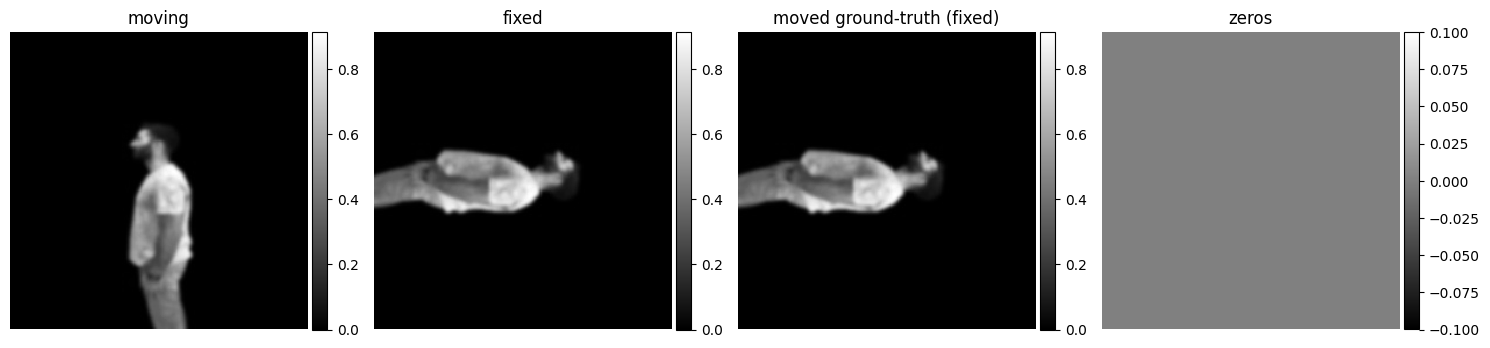

In [ ]:
# let's test it
train_generator = vxm_data_generator_affine(train_loader)
in_sample, out_sample = next(train_generator)

# visualize
images = [img[0, :, :, 0] for img in in_sample + out_sample]
titles = ['moving', 'fixed', 'moved ground-truth (fixed)', 'zeros']
ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True);

In [ ]:
nb_epochs = 100
hist = vxm_model.fit_generator(train_generator, epochs=nb_epochs,steps_per_epoch=50, verbose=2);

Epoch 1/100


<ipython-input-11-11fa5f409e00>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = vxm_model.fit_generator(train_generator, epochs=nb_epochs,steps_per_epoch=50, verbose=2);


50/50 - 30s - loss: 0.0332 - vxm_dense_transformer_loss: 0.0300 - vxm_dense_flow_loss: 0.1079 - 30s/epoch - 602ms/step
Epoch 2/100
50/50 - 7s - loss: 1117.1514 - vxm_dense_transformer_loss: 0.0276 - vxm_dense_flow_loss: 37237.4609 - 7s/epoch - 134ms/step
Epoch 3/100
50/50 - 7s - loss: 46360048.0000 - vxm_dense_transformer_loss: 0.0183 - vxm_dense_flow_loss: 1545334912.0000 - 7s/epoch - 135ms/step
Epoch 4/100
50/50 - 7s - loss: 527238880.0000 - vxm_dense_transformer_loss: 0.0199 - vxm_dense_flow_loss: 17574629376.0000 - 7s/epoch - 138ms/step
Epoch 5/100
50/50 - 7s - loss: 73450960.0000 - vxm_dense_transformer_loss: 0.0214 - vxm_dense_flow_loss: 2448365824.0000 - 7s/epoch - 136ms/step
Epoch 6/100
50/50 - 7s - loss: 274204.1875 - vxm_dense_transformer_loss: 0.0190 - vxm_dense_flow_loss: 9140139.0000 - 7s/epoch - 139ms/step
Epoch 7/100
50/50 - 7s - loss: 48916.9688 - vxm_dense_transformer_loss: 0.0217 - vxm_dense_flow_loss: 1630564.7500 - 7s/epoch - 137ms/step
Epoch 8/100
50/50 - 7s - loss

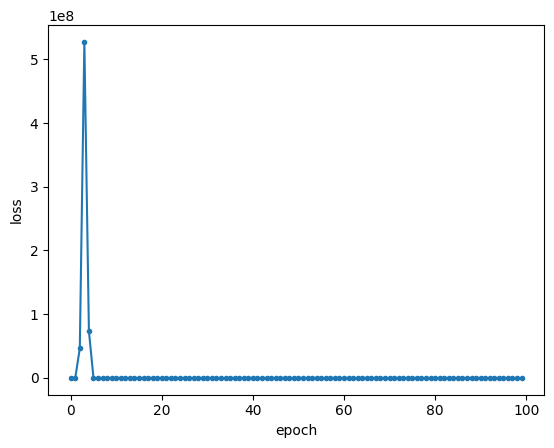

In [ ]:
import matplotlib.pyplot as plt

def plot_history(hist, loss_name='loss'):
    # Simple function to plot training history.
    plt.figure()
    plt.plot(hist.epoch, hist.history[loss_name], '.-')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

plot_history(hist)

In [ ]:
# let's get some data
val_generator = vxm_data_generator_affine(test_loader, batch_size = 1)
val_input, _ = next(val_generator)
for i in range(len(val_input)):
  val_input[i] = tf.convert_to_tensor(val_input[i].numpy())

In [ ]:
# %timeit is a 'jupyter magic' that times the given line over several runs
%timeit vxm_model.predict(val_input)

1/1 [==============================] - 0s 72ms/step
133 ms ± 27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
val_pred = vxm_model.predict(val_input)

1/1 [==============================] - 0s 71ms/step


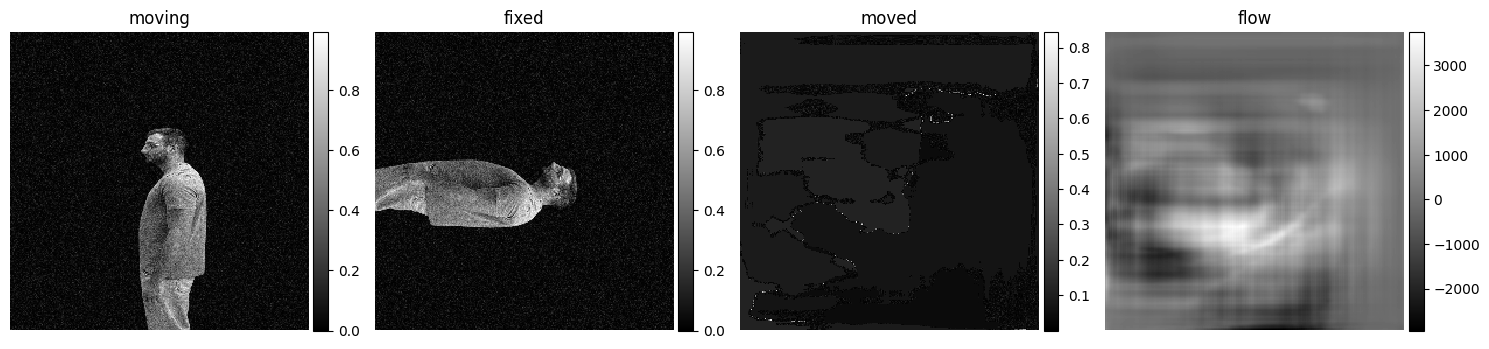

In [ ]:
# visualize
images = [img[0, :, :, 0] for img in val_input + val_pred]
titles = ['moving', 'fixed', 'moved', 'flow']
ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True);